In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/spam.csv.csv", sep='\t', header=None, names=["label", "message"])

# Map labels to binary values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Explore dataset
print("Dataset shape:", df.shape)
print(df['label'].value_counts())
print(df.head())


Dataset shape: (5575, 2)
Series([], Name: count, dtype: int64)
   label  message
0    NaN      NaN
1    NaN      NaN
2    NaN      NaN
3    NaN      NaN
4    NaN      NaN


In [ ]:
data['message'] = data['message'].apply(lambda x: x.lower())
display(data.head())

,label,message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
import re
data['message'] = data['message'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))
display(data.head())

,label,message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
data['message'] = data['message'].apply(lambda x: re.sub(r'\S+@\S+', '', x))
display(data.head())

,label,message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
data['message'] = data['message'].apply(lambda x: re.sub(r'\d+', '', x))
display(data.head())

,label,message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(data['message'])

# Display the shape of the resulting matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (5572, 5000)


In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
data['message'] = data['message'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
display(data.head())

,label,message
0,ham,"go jurong point, crazy.. avail bugi n great wo..."
1,ham,ok lar... joke wif u oni...
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor... u c alreadi say...
4,ham,"nah think goe usf, live around though"


In [ ]:
import nltk
nltk.download('punkt') # Download the punkt tokenizer if you haven't already
nltk.download('punkt_tab') # Download punkt_tab as suggested by the error

# Apply tokenization to the 'message' column
data['tokens'] = data['message'].apply(lambda x: nltk.word_tokenize(x))

# Display the first few rows with the new 'tokens' column
display(data.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,label,message,tokens
0,ham,"go jurong point, crazy.. avail bugi n great wo...","[go, jurong, point, ,, crazy, .., avail, bugi,..."
1,ham,ok lar... joke wif u oni...,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,spam,free entri wkli comp win fa cup final tkt st m...,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,ham,u dun say earli hor... u c alreadi say...,"[u, dun, say, earli, hor, ..., u, c, alreadi, ..."
4,ham,"nah think goe usf, live around though","[nah, think, goe, usf, ,, live, around, though]"


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
data['message'] = data['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
display(data.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,message
0,ham,"go jurong point, crazy.. available bugis n gre..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor... u c already say...
4,ham,"nah think goes usf, lives around though"


In [ ]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

# Apply stemming to the tokens in the 'tokens' column
data['stemmed_tokens'] = data['tokens'].apply(lambda token_list: [stemmer.stem(word) for word in token_list])

# Display the first few rows with the new 'stemmed_tokens' column
display(data.head())

,label,message,tokens,stemmed_tokens
0,ham,"go jurong point, crazy.. avail bugi n great wo...","[go, jurong, point, ,, crazy, .., avail, bugi,...","[go, jurong, point, ,, crazi, .., avail, bugi,..."
1,ham,ok lar... joke wif u oni...,"[ok, lar, ..., joke, wif, u, oni, ...]","[ok, lar, ..., joke, wif, u, oni, ...]"
2,spam,free entri wkli comp win fa cup final tkt st m...,"[free, entri, wkli, comp, win, fa, cup, final,...","[free, entri, wkli, comp, win, fa, cup, final,..."
3,ham,u dun say earli hor... u c alreadi say...,"[u, dun, say, earli, hor, ..., u, c, alreadi, ...","[u, dun, say, ear, hor, ..., u, c, alreadi, sa..."
4,ham,"nah think goe usf, live around though","[nah, think, goe, usf, ,, live, around, though]","[nah, think, goe, usf, ,, live, around, though]"


In [ ]:
# Join the stemmed tokens back into a string
data['clean_text'] = data['stemmed_tokens'].apply(lambda token_list: ' '.join(token_list))

# Display the first few rows with the new 'clean_text' column
display(data.head())

,label,message,tokens,stemmed_tokens,clean_text
0,ham,"go jurong point, crazy.. avail bugi n great wo...","[go, jurong, point, ,, crazy, .., avail, bugi,...","[go, jurong, point, ,, crazi, .., avail, bugi,...","go jurong point , crazi .. avail bugi n great ..."
1,ham,ok lar... joke wif u oni...,"[ok, lar, ..., joke, wif, u, oni, ...]","[ok, lar, ..., joke, wif, u, oni, ...]",ok lar ... joke wif u oni ...
2,spam,free entri wkli comp win fa cup final tkt st m...,"[free, entri, wkli, comp, win, fa, cup, final,...","[free, entri, wkli, comp, win, fa, cup, final,...",free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor... u c alreadi say...,"[u, dun, say, earli, hor, ..., u, c, alreadi, ...","[u, dun, say, ear, hor, ..., u, c, alreadi, sa...",u dun say ear hor ... u c alreadi say ...
4,ham,"nah think goe usf, live around though","[nah, think, goe, usf, ,, live, around, though]","[nah, think, goe, usf, ,, live, around, though]","nah think goe usf , live around though"


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'data' is your DataFrame and 'clean_text' is the processed text column
# and 'label' is your target column

X = data['clean_text']
y = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # You can adjust test_size and random_state

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Training data shape:", X_train_tfidf.shape)
print("Testing data shape:", X_test_tfidf.shape)

Training data shape: (4457, 5000)
Testing data shape: (1115, 5000)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train_tfidf, X_test_tfidf, y_train, y_test are ready

# 1. Initialize the model
model = MultinomialNB()

# 2. Train the model
model.fit(X_train_tfidf, y_train)

# 3. Predict on test set
y_pred = model.predict(X_test_tfidf)

# 4. Evaluate predictions
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9623318385650225

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



Accuracy: 0.9623318385650225


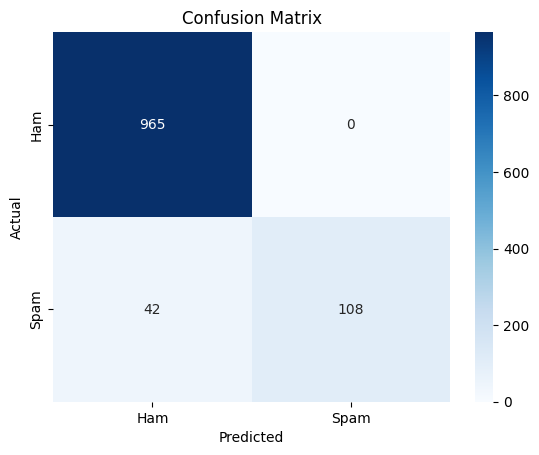

              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       965
        Spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 3. Precision, Recall, F1
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))
